In [188]:
#!pip install tslearn
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import LabelEncoder

from tslearn.clustering import KernelKMeans

import random
import matplotlib.pyplot as plt

In [189]:
seed = 42
n_samples = 10

X, y = make_circles(n_samples=n_samples, factor=0.2, noise=0.05, random_state=seed)

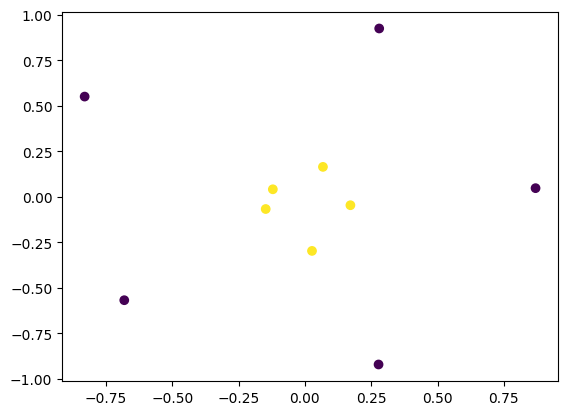

In [190]:
plt.scatter(X[:, 0], X[:, 1], c=y)

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


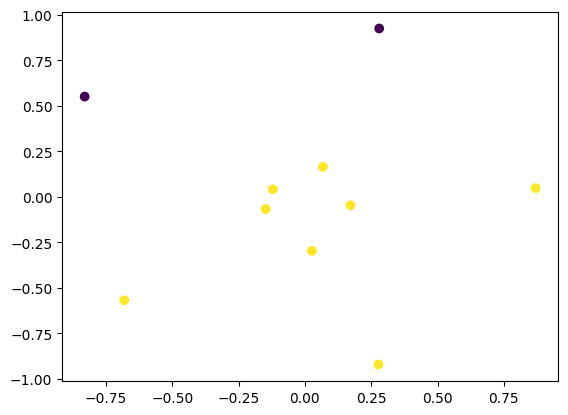

In [191]:
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

C:\Users\APDHP-DM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 10 1-dimensional timeseries
  warnings.warn(


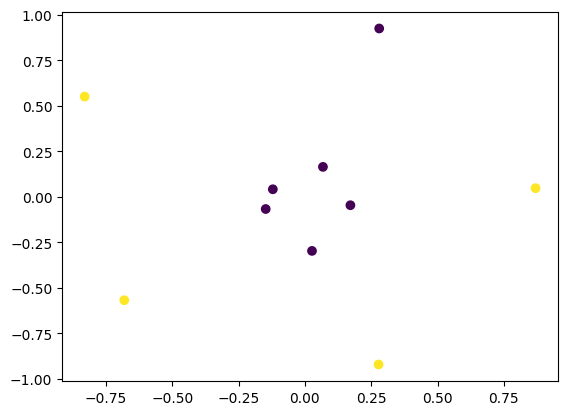

In [192]:
kernel = 'rbf'
kernel = pairwise_kernels(X, X, metric='rbf', gamma=5)
# Should find a way to init the fucking centers!
kernel_kmeans = KernelKMeans(n_clusters=2, n_init=1, kernel='precomputed').fit(kernel)
plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_)
plt.show()

### We want a function that given the kernel and number of clusters to return me the initial partition using the kernel k-means++ algorithm

In [193]:
def calculate_kernel_distances_between_points(center_index, centers_indices, X, kernel_matrix, kernel_distances_between_points):
    for i in range(X.shape[0]):
        if i not in centers_indices: 
            kernel_distances_between_points[center_index, i] = kernel_matrix[center_index, center_index] - 2 * kernel_matrix[center_index, i] + kernel_matrix[i, i]
    return kernel_distances_between_points

def get_initial_center_index(X):
    return random.randint(0, X.shape[0] - 1)

def select_next_center_index(centers_indices, probability_array):
    while(True):
        selected_index = np.random.choice(len(probability_array), p=probability_array)
        if(selected_index not in centers_indices):
            return selected_index

def calculate_points_probabilities_to_be_selected(kernel_distances_between_points):
    return kernel_distances_between_points / np.sum(kernel_distances_between_points)

def calculate_minimum_distances_from_centers_and_partition(centers_indices, kernel_distances_between_points):
    minimum_distances = np.zeros(kernel_distances_between_points.shape[1])
    partition = np.zeros(kernel_distances_between_points.shape[1], dtype=int)

    for i, column in enumerate(kernel_distances_between_points.T):
        nonzero_indices = np.nonzero(column)[0]
        if len(nonzero_indices) > 0:
            partition[i] = nonzero_indices[np.argmin(column[nonzero_indices])]
            minimum_distances[i] = column[partition[i]]
    
    # Make 0 the distances for centers and set their partition to their index
    minimum_distances[centers_indices] = 0
    partition[centers_indices] = centers_indices
    
    return minimum_distances, partition

def scale_partition(partition):
    return LabelEncoder().fit_transform(partition)

def calculate_initial_partition(K, X, kernel_matrix):
    centers_indices = []
    n_samples = X.shape[0]
    kernel_distances_between_points = np.zeros((n_samples, n_samples))
    
    i = 0
    while i < K:
        if i != 0:
            centers_indices.append(select_next_center_index(centers_indices, probabilities))
        else:
            centers_indices.append(get_initial_center_index(X))
        print(f"\n {i} Center Finding Procedure")
        print(f"\n centers_indices are: {centers_indices}")
        kernel_distances_between_points = calculate_kernel_distances_between_points(centers_indices[i], centers_indices, X, kernel_matrix, kernel_distances_between_points)
        #print(f"\n new kernel_distances_between_points are: {kernel_distances_between_points}")
        minimum_distances, partition = calculate_minimum_distances_from_centers_and_partition(centers_indices, kernel_distances_between_points)
        print(f"\n minimum_distances are: {minimum_distances} and partition is: {partition}")
        probabilities = calculate_points_probabilities_to_be_selected(minimum_distances)
        i += 1
        
    return scale_partition(partition)



 Start: 0

 0 Center Finding Procedure

 centers_indices are: [3]

 minimum_distances are: [1.98939239 1.99249292 1.8324351  0.         1.98516913 1.9999997
 1.96831789 1.99681707 1.99999819 1.92474565] and partition is: [3 3 3 3 3 3 3 3 3 3]

 1 Center Finding Procedure

 centers_indices are: [3, 2]

 minimum_distances are: [0.80125843 1.98309229 1.8324351  0.         0.7448154  1.99777197
 0.68564748 1.95886856 1.98646055 0.48151223] and partition is: [2 2 2 3 2 2 2 2 2 2]


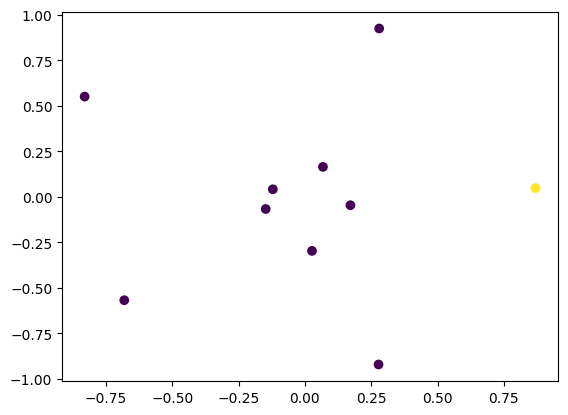


 End: 0

 Start: 1

 0 Center Finding Procedure

 centers_indices are: [3]

 minimum_distances are: [1.98939239 1.99249292 1.8324351  0.         1.98516913 1.9999997
 1.96831789 1.99681707 1.99999819 1.92474565] and partition is: [3 3 3 3 3 3 3 3 3 3]

 1 Center Finding Procedure

 centers_indices are: [3, 9]

 minimum_distances are: [0.78774854 1.91129355 0.48151223 0.         0.44884349 1.98322256
 1.31674839 1.99556984 1.99172414 1.92474565] and partition is: [9 9 9 3 9 9 9 9 9 9]


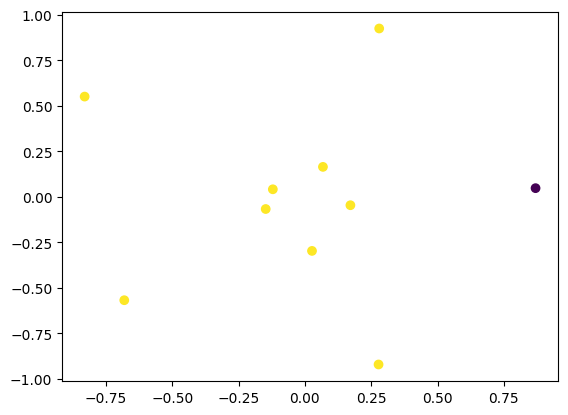


 End: 1

 Start: 2

 0 Center Finding Procedure

 centers_indices are: [8]

 minimum_distances are: [1.8624179  1.99999971 1.98646055 1.99999819 1.93492816 1.99657378
 1.88670753 1.98916175 0.         1.99172414] and partition is: [8 8 8 8 8 8 8 8 8 8]

 1 Center Finding Procedure

 centers_indices are: [8, 7]

 minimum_distances are: [1.8624179  1.99999971 1.95886856 1.99681707 1.93492816 1.99657378
 1.79161506 1.98916175 0.         1.99172414] and partition is: [8 8 7 7 8 8 7 7 8 8]


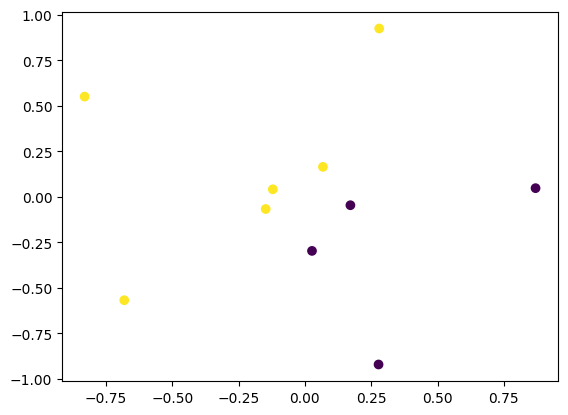


 End: 2

 Start: 3

 0 Center Finding Procedure

 centers_indices are: [8]

 minimum_distances are: [1.8624179  1.99999971 1.98646055 1.99999819 1.93492816 1.99657378
 1.88670753 1.98916175 0.         1.99172414] and partition is: [8 8 8 8 8 8 8 8 8 8]

 1 Center Finding Procedure

 centers_indices are: [8, 3]

 minimum_distances are: [1.8624179  1.99249292 1.8324351  1.99999819 1.93492816 1.99657378
 1.88670753 1.98916175 0.         1.92474565] and partition is: [8 3 3 3 8 8 8 8 8 3]


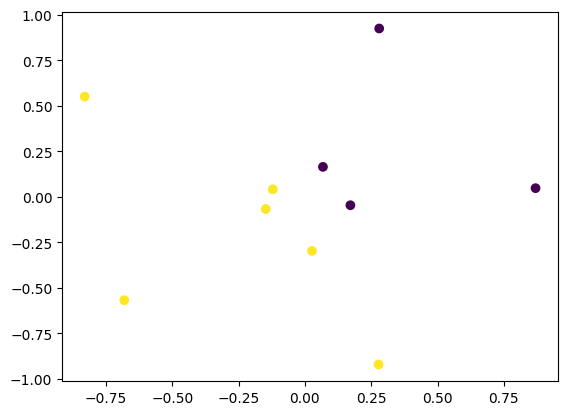


 End: 3

 Start: 4

 0 Center Finding Procedure

 centers_indices are: [9]

 minimum_distances are: [0.78774854 1.91129355 0.48151223 1.92474565 0.44884349 1.98322256
 1.31674839 1.99556984 1.99172414 0.        ] and partition is: [9 9 9 9 9 9 9 9 9 9]

 1 Center Finding Procedure

 centers_indices are: [9, 8]

 minimum_distances are: [0.78774854 1.91129355 0.48151223 1.92474565 0.44884349 1.98322256
 1.31674839 1.98916175 1.99172414 0.        ] and partition is: [9 9 9 9 9 9 9 8 8 9]


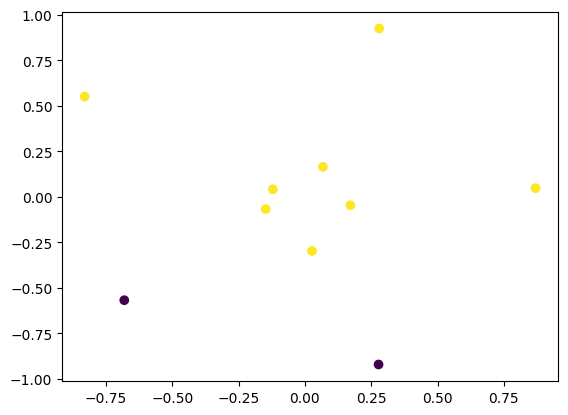


 End: 4

 Start: 5

 0 Center Finding Procedure

 centers_indices are: [4]

 minimum_distances are: [0.12090502 1.98192019 0.7448154  1.98516913 0.         1.95585635
 0.9888449  1.99120276 1.93492816 0.44884349] and partition is: [4 4 4 4 4 4 4 4 4 4]

 1 Center Finding Procedure

 centers_indices are: [4, 7]

 minimum_distances are: [0.12090502 1.98192019 0.7448154  1.98516913 0.         1.95585635
 0.9888449  1.99120276 1.93492816 0.44884349] and partition is: [4 4 4 4 4 4 4 7 4 4]


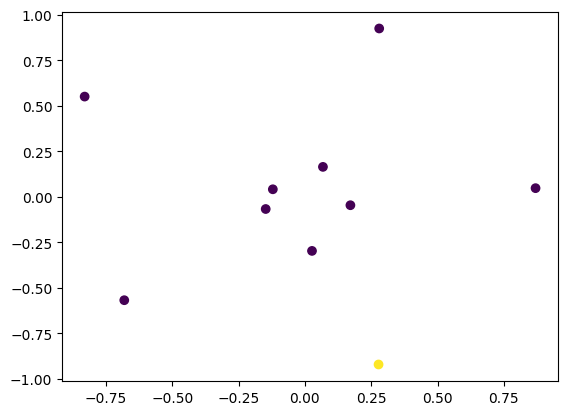


 End: 5

 Start: 6

 0 Center Finding Procedure

 centers_indices are: [4]

 minimum_distances are: [0.12090502 1.98192019 0.7448154  1.98516913 0.         1.95585635
 0.9888449  1.99120276 1.93492816 0.44884349] and partition is: [4 4 4 4 4 4 4 4 4 4]

 1 Center Finding Procedure

 centers_indices are: [4, 8]

 minimum_distances are: [0.12090502 1.98192019 0.7448154  1.98516913 0.         1.95585635
 0.9888449  1.98916175 1.93492816 0.44884349] and partition is: [4 4 4 4 4 4 4 8 8 4]


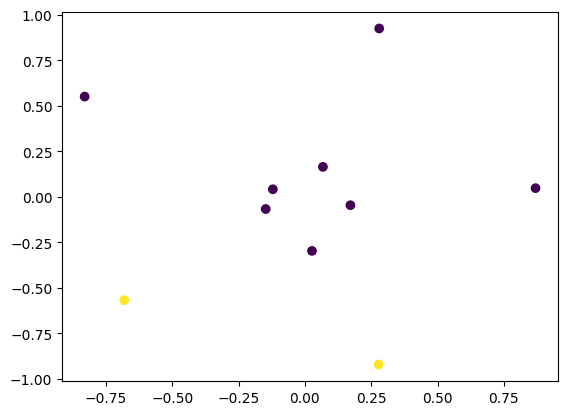


 End: 6

 Start: 7

 0 Center Finding Procedure

 centers_indices are: [5]

 minimum_distances are: [1.97110512 1.99791208 1.99777197 1.9999997  1.95585635 0.
 1.99860364 1.99999991 1.99657378 1.98322256] and partition is: [5 5 5 5 5 5 5 5 5 5]

 1 Center Finding Procedure

 centers_indices are: [5, 7]

 minimum_distances are: [1.97110512 1.99791208 1.95886856 1.99681707 1.95585635 0.
 1.79161506 1.99999991 1.98916175 1.98322256] and partition is: [5 5 7 7 5 5 7 7 7 5]


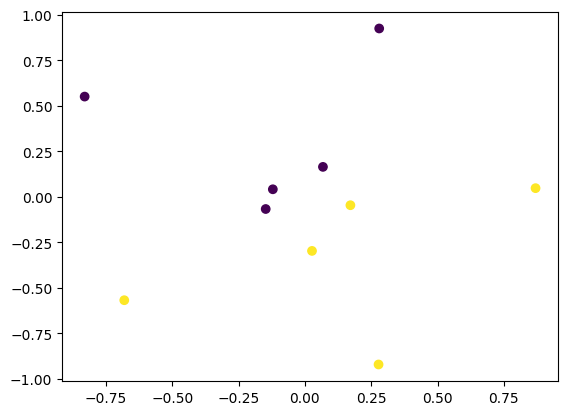


 End: 7

 Start: 8

 0 Center Finding Procedure

 centers_indices are: [6]

 minimum_distances are: [0.68209003 1.99916997 0.68564748 1.96831789 0.9888449  1.99860364
 0.         1.79161506 1.88670753 1.31674839] and partition is: [6 6 6 6 6 6 6 6 6 6]

 1 Center Finding Procedure

 centers_indices are: [6, 8]

 minimum_distances are: [0.68209003 1.99916997 0.68564748 1.96831789 0.9888449  1.99657378
 0.         1.79161506 1.88670753 1.31674839] and partition is: [6 6 6 6 6 8 6 6 8 6]


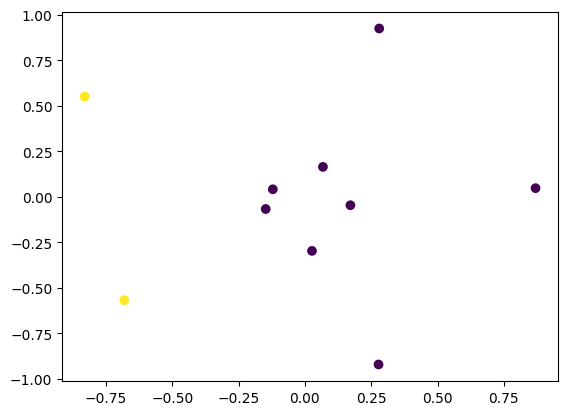


 End: 8

 Start: 9

 0 Center Finding Procedure

 centers_indices are: [1]

 minimum_distances are: [1.99414611 0.         1.98309229 1.99249292 1.98192019 1.99791208
 1.99916997 1.99999992 1.99999971 1.91129355] and partition is: [1 1 1 1 1 1 1 1 1 1]

 1 Center Finding Procedure

 centers_indices are: [1, 5]

 minimum_distances are: [1.97110512 0.         1.98309229 1.99249292 1.95585635 1.99791208
 1.99860364 1.99999991 1.99657378 1.91129355] and partition is: [5 1 1 1 5 5 5 5 5 1]


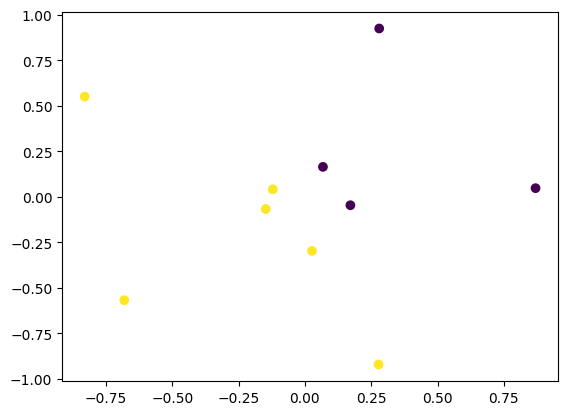


 End: 9


In [194]:
def kernel_kmeans_pp(X, K, kernel_matrix, n_init=10):
    for i in range(n_init):
        
        print(f"\n Start: {i}")
        partition = calculate_initial_partition(K, X, kernel_matrix)
        plt.scatter(X[:, 0], X[:, 1], c = partition)
        plt.show()
        print(f"\n End: {i}")
K = 2
gaussian_kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=5)
kernel_matrix = gaussian_kernel_matrix
kernel_kmeans_pp(X, 2, kernel_matrix)